In [1]:
from nltk import tokenize

In [2]:
import re

In [3]:
cite = re.compile('(\[\d+\])')
space = re.compile('\s',re.ASCII)
posess = re.compile("(\'s)")
plural = re.compile('(s )')

In [4]:
with open('wikipedia-actingcareer.txt','r') as wiki:
    article = wiki.read()
wiki.close()

In [5]:
import string
punc = string.punctuation
nums = string.digits

In [113]:
# Tokenize as a sentence
a = tokenize.sent_tokenize(''.join(article))
# Remove citations and replace with nothing
b = [re.sub(cite,'',x) for x in a]
# Remove whitespace characters besides ' ' and 
# replace with just a space (' ')
c = [re.sub(space,' ',y) for y in b]
# Remove "'s" and replace with nothing
d = [re.sub(posess,'',z) for z in c]
# Removing trailing spaces
e = [w.strip() for w in d]
# Join list into a string
f = ''.join(e)
# Tokenize individual words (not sentence)
words = tokenize.word_tokenize(f)

In [114]:
f

'Since his film debut with a minor role in Fast Times at Ridgemont High (1982), opposite Judge Reinhold and Sean Penn, Cage has appeared in a wide range of films, both mainstream and offbeat.He auditioned for the role of Dallas Winston in his uncle film The Outsiders, based on S.E.Hinton novel, but lost to Matt Dillon.He was also in Coppola films Rumble Fish and Peggy Sue Got Married.Other Cage roles included appearances in the acclaimed 1987 romantic-comedy film Moonstruck, also starring Cher; the Coen Brothers cult-classic comedy Raising Arizona; David Lynch 1990 film Wild at Heart; a lead role in Martin Scorsese 1999 New York City paramedic drama Bringing Out the Dead; and Ridley Scott 2003 black comedy crime film Matchstick Men, in which he played a con artist with obsessive-compulsive disorder.Cage at the 66th Venice Film Festival in September 2009 Cage has been nominated twice for an Academy Award, winning once for his performance as a suicidal alcoholic in Leaving Las Vegas.His 

In [101]:
#import spacy
#nlp=spacy.load('en_core_web_lg')
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

In [117]:
final_words = [w.lower() for w in words if w.lower() not in stopwords and w not in punc]

In [103]:
import pandas as pd

In [118]:
from nltk.probability import FreqDist
fdist = FreqDist(final_words)
pd.DataFrame(fdist.most_common(10))

,0,1
0,film,39
1,cage,27
2,starred,9
3,role,8
4,reviews,7
5,performance,6
6,received,6
7,films,5
8,also,5
9,lead,5


In [105]:
import pandas as pd

In [106]:
wiki_df = pd.DataFrame(e,columns=['Sentence'])

In [107]:
wiki_df.head(5)

,Sentence
0,Since his film debut with a minor role in Fast...
1,He auditioned for the role of Dallas Winston i...
2,"Hinton novel, but lost to Matt Dillon."
3,He was also in Coppola films Rumble Fish and P...
4,Other Cage roles included appearances in the a...


In [108]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment_analyzer = SentimentIntensityAnalyzer()

In [109]:
sent_dict = {}
for sentence in wiki_df.Sentence:
    sent_dict[sentence] = sentiment_analyzer.polarity_scores(sentence)

In [110]:
s_df = pd.DataFrame(sent_dict)
s_df = s_df.T
s_df

,compound,neg,neu,pos
"Since his film debut with a minor role in Fast Times at Ridgemont High (1982), opposite Judge Reinhold and Sean Penn, Cage has appeared in a wide range of films, both mainstream and offbeat.",0.0000,0.000,1.000,0.000
"He auditioned for the role of Dallas Winston in his uncle film The Outsiders, based on S.E.",0.0000,0.000,1.000,0.000
"Hinton novel, but lost to Matt Dillon.",-0.3182,0.307,0.521,0.172
He was also in Coppola films Rumble Fish and Peggy Sue Got Married.,0.0000,0.000,1.000,0.000
"Other Cage roles included appearances in the acclaimed 1987 romantic-comedy film Moonstruck, also starring Cher; the Coen Brothers cult-classic comedy Raising Arizona; David Lynch 1990 film Wild at Heart; a lead role in Martin Scorsese 1999 New York City paramedic drama Bringing Out the Dead; and Ridley Scott 2003 black comedy crime film Matchstick Men, in which he played a con artist with obsessive-compulsive disorder.",-0.6249,0.140,0.761,0.099
"Cage at the 66th Venice Film Festival in September 2009 Cage has been nominated twice for an Academy Award, winning once for his performance as a suicidal alcoholic in Leaving Las Vegas.",0.6808,0.108,0.649,0.243
His other nomination was for his portrayal of real-life screenwriter Charlie Kaufman and Kaufman fictional twin Donald in Adaptation.,0.0000,0.000,1.000,0.000
"Despite these successes, most of his lower-profile films have performed poorly at the box office compared to his mainstream action/adventure roles.",-0.4449,0.128,0.872,0.000
The suspense thriller 8mm (1999) is considered a cult film.,0.1027,0.000,0.851,0.149
He took the lead role in the 2001 film Captain Corelli Mandolin and learned to play the mandolin from scratch for the part.,0.3400,0.000,0.902,0.098


In [123]:
#from nltk.collocations import *
from nltk.collocations import BigramAssocMeasures as bigram
from nltk.collocations import TrigramAssocMeasures as trigram

In [134]:
finder1 = BigramCollocationFinder.from_words(final_words)
finder2 = TrigramCollocationFinder.from_words(final_words)

In [135]:
scored1 = finder1.score_ngrams(bigram.raw_freq)
scored2 = finder2.score_ngrams(trigram.raw_freq)

In [156]:
scored1_clean = []
nope = "\t\n\s''\\``..."
for i in range(len(scored1)-1):
        if nope in scored1[i][0][0] or nope in scored1[i][0][1]:
            pass
        elif scored1[i][0][0] in nope or scored1[i][0][1] in nope:
            pass
        #elif wspace in scored[i][0][0] or wspace in scored[i][0][1]:
        #    pass
        else:
            scored1_clean.append(scored[i])

In [132]:
scored1_clean

[(('box', 'office'), 0.005296610169491525),
 (('cage', 'starred'), 0.00423728813559322),
 (('international', 'film'), 0.00423728813559322),
 (('2009', 'cage'), 0.0031779661016949155),
 (('film', 'festival'), 0.0031779661016949155),
 (('ghost', 'rider'), 0.0031779661016949155),
 (('lead', 'role'), 0.0031779661016949155),
 (('nicolas', 'cage'), 0.0031779661016949155),
 (('positive', 'reviews'), 0.0031779661016949155),
 (('19', '2018'), 0.00211864406779661),
 (('academy', 'award'), 0.00211864406779661),
 (('animated', 'film'), 0.00211864406779661),
 (('cage', 'appeared'), 0.00211864406779661),
 (('cage', 'performance'), 0.00211864406779661),
 (('crime', 'drama'), 0.00211864406779661),
 (('directorial', 'debut'), 0.00211864406779661),
 (('drama', 'film'), 0.00211864406779661),
 (('film', 'directed'), 0.00211864406779661),
 (('film', 'festival.it'), 0.00211864406779661),
 (('film', 'plays'), 0.00211864406779661),
 (('film', 'received'), 0.00211864406779661),
 (('january', '19'), 0.002118644

In [159]:
df1 = pd.DataFrame(scored1_clean,columns=['Collocation','Score'])
df1.head(10)

,Collocation,Score
0,"(box, office)",0.005297
1,"(cage, starred)",0.004237
2,"(international, film)",0.004237
3,"(2009, cage)",0.003178
4,"(film, festival)",0.003178
5,"(ghost, rider)",0.003178
6,"(lead, role)",0.003178
7,"(nicolas, cage)",0.003178
8,"(positive, reviews)",0.003178
9,"(19, 2018)",0.002119


In [157]:
scored2_clean = []
for i in range(len(scored2)-1):
        if nope in scored2[i][0][0] or nope in scored2[i][0][1] or nope in scored2[i][0][2]:
            pass
        elif scored2[i][0][0] in nope or scored2[i][0][1] in nope or scored2[1][0][2] in nope:
            pass
        #elif wspace in scored[i][0][0] or wspace in scored[i][0][1]:
        #    pass
        else:
            scored2_clean.append(scored2[i])

In [160]:
df2 = pd.DataFrame(scored2_clean,columns=['Collocation','Score'])
df2.head(10)

,Collocation,Score
0,"(2009, cage, starred)",0.002119
1,"(crime, drama, film)",0.002119
2,"(drama, film, directed)",0.002119
3,"(international, film, festival)",0.002119
4,"(international, film, festival.it)",0.002119
5,"(january, 19, 2018)",0.002119
6,"(new, york, city)",0.002119
7,"(positive, reviews, critics)",0.002119
8,"(received, positive, reviews)",0.002119
9,"(toronto, international, film)",0.002119


In [84]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Distribution of Negative Reviews')

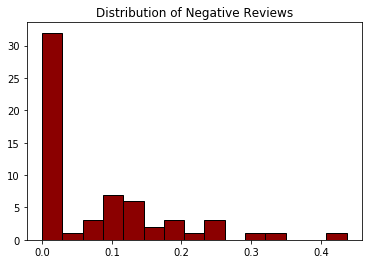

In [163]:
plt.hist(s_df.neg, bins=15,color='darkred',edgecolor='black')
plt.title('Distribution of Negative Reviews')

Text(0.5, 1.0, 'Distribution of Neutral Reviews')

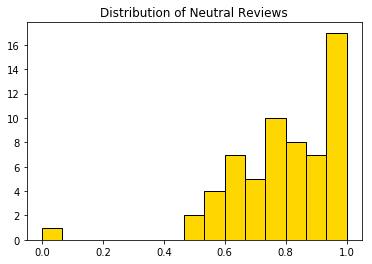

In [164]:
plt.hist(s_df.neu, bins=15, edgecolor='black',color='gold')
plt.title('Distribution of Neutral Reviews')

Text(0.5, 1.0, 'Distribution of Positive Reviews')

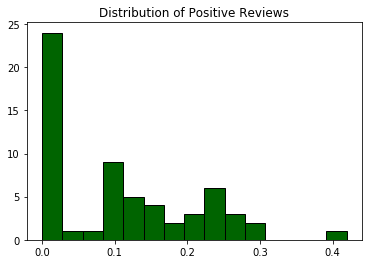

In [165]:
plt.hist(s_df.pos, bins=15,edgecolor='black', color='darkgreen')
plt.title('Distribution of Positive Reviews')